# Simulation de variables aléatoire

L'objectif de ce projet est de simuler pour comprendre ce qu'est une variable aléatoire. 

Nous simulerons d'abord le jeu de *pile ou face* puis le *lancé de dé*. 
À partir des *histogrammes* issus des tirages aléatoires de ces deux expériences nous allons aborder la notion de *fonction de répartition* dans le cadre des variables aléatoires discrètes. 

Votre mission va être ensuite d'explorer ces caractéristique pour d'autres variables aléatoires.


In [1]:
import random, bisect
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Some useful functions

def flipCoin(n):
    # On simule n lancés d'une pièce équilibrée
    values = []
    for i in range(n):
        s = random.random()
        if s < 0.5:
            values.append(0)
        else:
            values.append(1)
    return(values)


def rollDie(n):
    # On simule n lancés d'un dé non truqué
    values = []
    for i in range(n):
        s = random.random()
        if s < 1./6:
            values.append(1)
        elif s < 2./6:
            values.append(2)
        elif s < 3./6:
            values.append(3)
        elif s < 4./6:
            values.append(4)
        elif s < 5./6:
            values.append(5)
        else:
            values.append(6)
    return(values)

def simulateRV(probVect, n):
    # Simule une variable aleatoire à partir d'un vecteur de proba
    values = []
    if (min(probVect) < 0) or (sum(probVect) != 1):
        print("No valid probability vector")
        return([])
    p = [probVect[0]]
    for i in range(1, len(probVect)):
        p.append(p[-1] + probVect[i])
    for i in range(n):
        s = random.random()
        values.append(bisect.bisect(p, s))
    return(values)
    

# Pile ou Face ?

In [3]:
n = 10000
values = flipCoin(n)

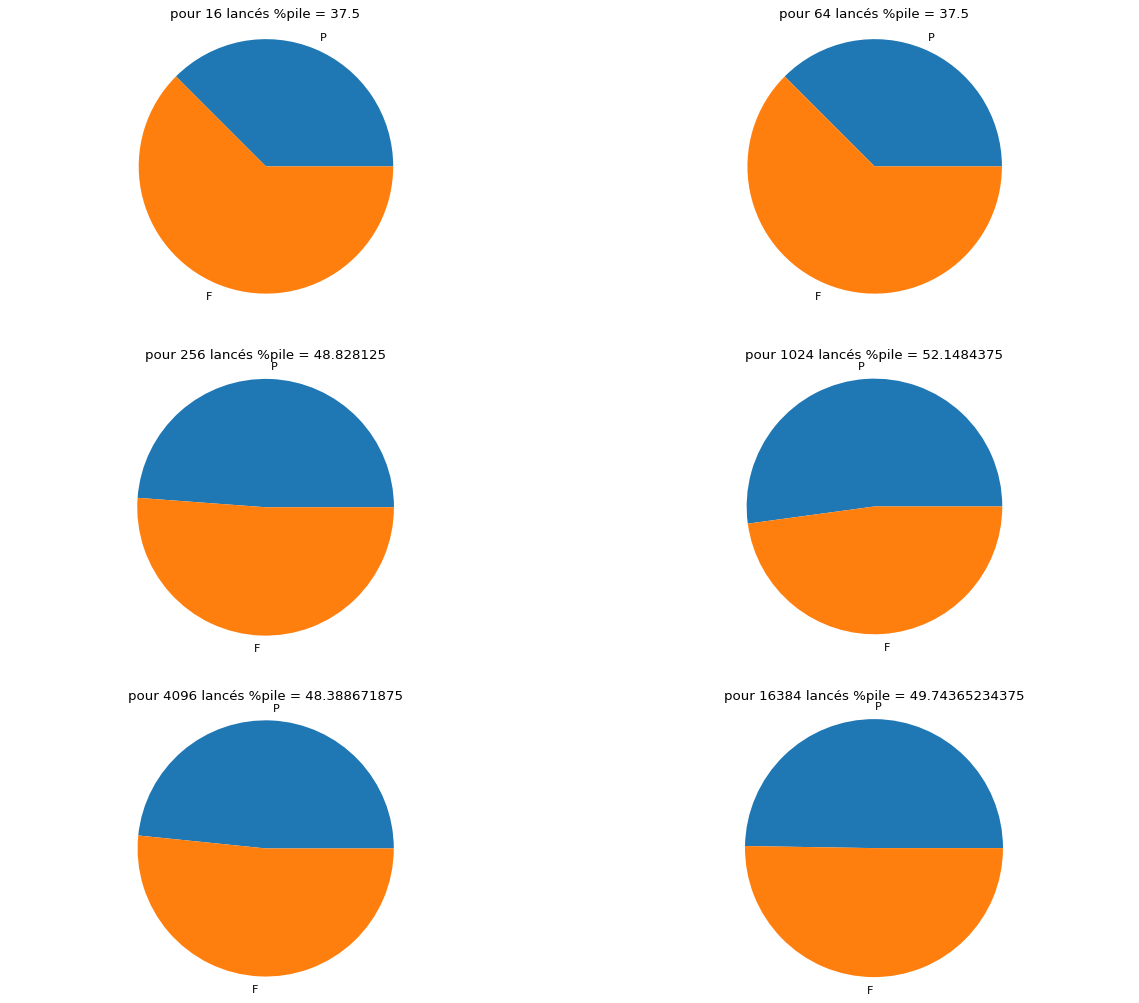

In [4]:
random.seed(51)
nValues = [2**i for i in range(4,16,2)]
labels = 'P','F'
i = 321
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for n in nValues :
    values = flipCoin(n)
    nPile = values.count(0)
    fracs = [nPile,n-nPile]
    ax = plt.subplot(i)
    plt.pie(fracs,labels=labels)
    ax.set_title("pour "+str(n)+" lancés %pile = "+str(nPile/n*100))
    plt.axis('equal')
    i +=1
    

Que peut-on observer sur le nombre de piles et de faces ?

In [5]:
nb0 = values.count(0)
nb1 = values.count(1)

In [6]:
print(nb0, nb1)

8150 8234


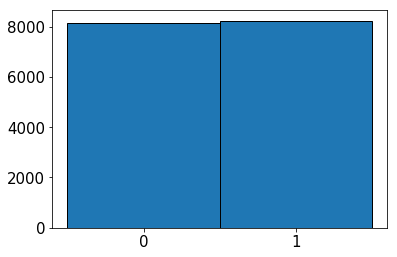

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(values, bins=[-0.5, 0.5, 1.5], histtype='bar', ec='black')
ax.set_xticks([0, 1])
ax.tick_params(labelsize=15)
plt.show()

# Lancé du dé

In [8]:
dValues = rollDie(n)

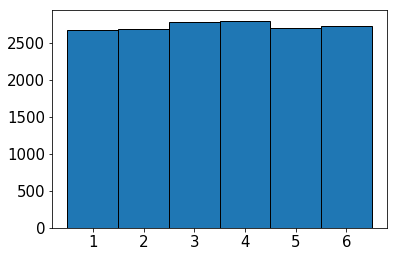

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dValues, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], histtype='bar', ec='black')
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.tick_params(labelsize=15)
plt.show()

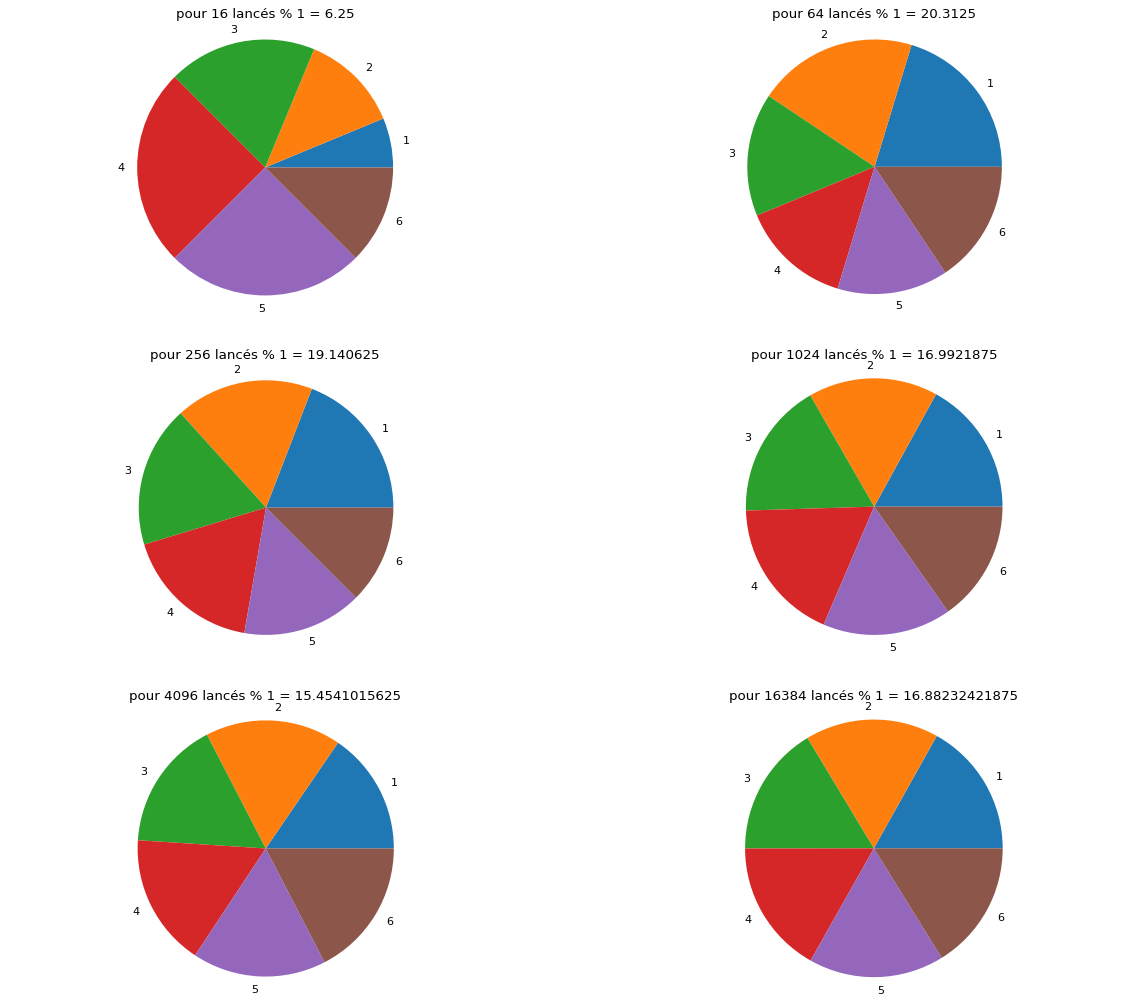

In [10]:
random.seed(133)
nValues = [2**i for i in range(4,16,2)]
labels = '1','2','3','4','5','6'
i = 321
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for n in nValues :
    values = rollDie(n)
    fracs = [values.count(nombre) for nombre in range(1,7)]
    ax = plt.subplot(i)
    plt.pie(fracs,labels=labels)
    ax.set_title("pour "+str(n)+" lancés % 1 = "+str(fracs[0]/n*100))
    plt.axis('equal')
    i +=1
    

À vous de jouer !
------
* À partir des codes précédents simuler le lancé d'une piece chargée (biasée) suivant une loi de Bernouilli (https://fr.wikipedia.org/wiki/Loi_de_Bernoulli) avec $$p \neq \frac{1}{10}$$
* À partir de votre implémentation de la loi de Bernouilli simuler une loi Binomiale (https://fr.wikipedia.org/wiki/Loi_binomiale)
